# Python Pathlib

This module offers classes representing filesystem paths with semantics appropriate for different operating systems

Pathlib has two kind of paths, a) **pure paths** that you use them if you want to manipulate for example windows paths on a Unix machine (or vice verca), that is manipulate paths without actually accessing the OS and b) **concrete paths** which inherit from pure paths and provide OS operations, that is you can't instantiate a `WindowsPath` when running on Unix. 

That is, You cannot instantiate a `WindowsPath` when running on Unix, but you can instantiate `PureWindowsPath`.

Most likely the `pathlib.Path` is the class that you are going to use to manipulate paths, that creates a **concrete path** that is either a `PosixPath` or a `WindowsPath`

In [26]:
# import the Path class
from pathlib import Path
import pathlib

In [2]:
# let's again create another variable with a path to manipulate later
mypath = 'c:/Users/User/Desktop/zipped_file.tar.gz'

In [3]:
# insert your path into the Path class and get a "concrete" pathlib path
pathlib_path = Path(mypath)
pathlib_path # i am on windows so it gives a concrete WindowsPath

WindowsPath('c:/Users/User/Desktop/zipped_file.tar.gz')

In [27]:
# you can also instantiate a Pure path with pathlib.PurePath() but we will not use it in this tutorial
pathlib.PurePath('mypath')

PureWindowsPath('mypath')

In [7]:
# get the current working directory
Path.cwd()

One thing that facilitates the path manipulation using pathlib is accessing its sub-parts:

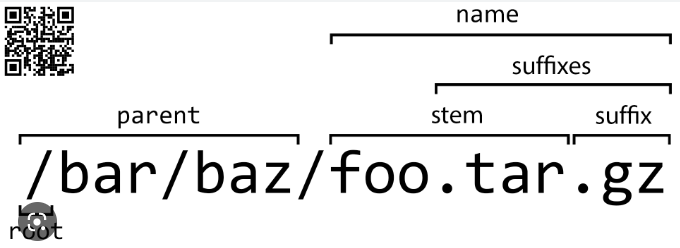

In [16]:
# get all the sub-parts of the path just with a dot operation
print(pathlib_path)
print(20*'--')
print('pathlib_path.parent  -->  ', pathlib_path.parent)
print('pathlib_path.parents  -->  ', list(pathlib_path.parents))
print('pathlib_path.name  -->  ', pathlib_path.name)
print('pathlib_path.stem -->  ', pathlib_path.stem)
print('pathlib_path.suffix -->  ', pathlib_path.suffix)
print('pathlib_path.suffixes -->  ', list(pathlib_path.suffixes))

c:\Users\User\Desktop\zipped_file.tar.gz
----------------------------------------
pathlib_path.parent  -->   c:\Users\User\Desktop
pathlib_path.parents  -->   [WindowsPath('c:/Users/User/Desktop'), WindowsPath('c:/Users/User'), WindowsPath('c:/Users'), WindowsPath('c:/')]
pathlib_path.name  -->   zipped_file.tar.gz
pathlib_path.stem -->   zipped_file.tar
pathlib_path.suffix -->   .gz
pathlib_path.suffixes -->   ['.tar', '.gz']


In [25]:
# you can also split all the path in to parts and get each one individually
pathlib_path.parts

('c:\\', 'Users', 'User', 'Desktop', 'zipped_file.tar.gz')

In [19]:
# convert the windows path into a posix path (Return a string representation of the path with forward slashes (/))
print('pathlib_path is a windows OS: ', pathlib_path)
print('pathlib_path as a posix path: ', pathlib_path.as_posix())


pathlib_path is a windows OS:  c:\Users\User\Desktop\zipped_file.tar.gz
pathlib_path as a posix path:  c:/Users/User/Desktop/zipped_file.tar.gz


In [20]:
# return a new path with the name changed (new name is "another_name.txt")
print('Before: ', pathlib_path)
print('After: ', pathlib_path.with_name('another_name.txt'))

Before:  c:\Users\User\Desktop\zipped_file.tar.gz
After:  c:\Users\User\Desktop\another_name.txt


In [22]:
# return a new path with the stem changed (new stem is "another_stem")
print('Before: ', pathlib_path)
print('After: ', pathlib_path.with_stem('another_stem'))
# take a note that here the stem changes and NOT the name, that is the extension remains the same (.gz) but the rest of it
# that is the zipped_file.tar changes to another_stem

Before:  c:\Users\User\Desktop\zipped_file.tar.gz
After:  c:\Users\User\Desktop\another_stem.gz


In [24]:
# return a new path with the suffix changed (new suffix is ".py")
print('Before: ', pathlib_path)
print('After: ', pathlib_path.with_suffix('.py'))

Before:  c:\Users\User\Desktop\zipped_file.tar.gz
After:  c:\Users\User\Desktop\zipped_file.tar.py


In [29]:
# Return a new path object representing the user’s home directory
Path.home()
# this is the "~" in the unix terminal

In [30]:
# check if path exists (in my case it doesn't)
pathlib_path.exists()

False

In [31]:
# check if the path points to a file
pathlib_path.is_file()

False

In [32]:
# check if the path points to a folder
pathlib_path.is_dir()

False

In [35]:
# loop through the contents of a folder (here we will use the current path)
contents = Path.cwd().iterdir() # it returns a generator object to loop
for cont in contents:
    print(cont) # it will return the ABSOLUTE (whole) path of each item in the folder as a concrete path!!

In [47]:
# use the forward slash to join multiple paths together (you need to have at least one pathlib.Path path)
print(Path('c:/Users/User') / 'Desktop/myfile.txt')
print('c:/Users/User' / Path('Desktop/myfile.txt'))
print(Path('c:/Users/User') / Path('Desktop/myfile.txt'))

c:\Users\User\Desktop\myfile.txt
c:\Users\User\Desktop\myfile.txt
c:\Users\User\Desktop\myfile.txt


In [45]:
# however this will give an error
print('c:/users/User' / 'Desktop/myfile.txt')
# you need to have at least one pathlib path at the left-most part in the path or between the str objects

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [55]:
# create a directory from a pathlib path
pathlib_path_folder = Path.cwd() / 'random_folder' # let's create a folder in the current path called random_folder

pathlib_path_folder.mkdir(exist_ok=False, parents=False)
# If exist_ok is true, FileExistsError exceptions will be ignored 
# If parents is true, any missing parents of this path are created as needed

In [51]:
# open a file to read and write in the current working directory
file_to_write = Path().cwd() / 'random_file.txt'
with file_to_write.open(mode='w') as fw:
    fw.write('hello world!')
    

In [54]:
# not let's read it
with file_to_write.open(mode='r') as fr:
    print(fr.read())

hello world!


In [56]:
# create an empty file in the current directory
empty_file = Path().cwd() / 'an_empty_file.txt'
empty_file.touch()

In [60]:
# remove the random_folder that we created earlier
pathlib_path_folder.rmdir()

In [ ]:
match, joinpath, glob